# Using LAMMPS with iPython and Jupyter

LAMMPS can be run interactively using iPython easily. This tutorial shows how to set this up.

## Installation

1. Download the latest version of LAMMPS into a folder (we will calls this `$LAMMPS_DIR` from now on)
2. Compile LAMMPS as a shared library and enable PNG support
   ```bash
   cd $LAMMPS_DIR/src
   python2 Make.py -m mpi -png -a file
   make mode=shlib auto
   ```

3. Create a python virtualenv
   ```bash
   virtualenv testing
   source testing/bin/activate
   ```

4. Inside the virtualenv install the lammps package
   ```
   (testing) cd $LAMMPS_DIR/python
   (testing) python install.py
   (testing) cd   # move to your working directory
   ```

5. Install jupyter and ipython in the virtualenv
   ```bash
   (testing) pip install ipython jupyter
   ```

6. Run jupyter notebook
   ```bash
   (testing) jupyter notebook
   ```

## Example

In [1]:
from lammps import lammps, LammpsIPythonWrapper

In [2]:
lmp = lammps()
L = LammpsIPythonWrapper(lmp)

In [3]:
# 3d Lennard-Jones melt

L.units("lj")
L.atom_style("atomic")
L.atom_modify("map array")

L.lattice("fcc", 0.8442)
L.region("box block", 0, 4, 0, 4, 0, 4)
L.create_box(1, "box")
L.create_atoms(1, "box")
L.mass(1, 1.0)

L.velocity("all create", 1.44, 87287, "loop geom")

L.pair_style("lj/cut", 2.5)
L.pair_coeff(1, 1, 1.0, 1.0, 2.5)

L.neighbor(0.3, "bin")
L.neigh_modify("delay 0 every 20 check no")

L.fix("1 all nve")

L.variable("fx atom fx")

L.run(10)

['Neighbor list info ...',
 '  1 neighbor list requests',
 '  update every 20 steps, delay 0 steps, check no',
 '  max neighbors/atom: 2000, page size: 100000',
 '  master list distance cutoff = 2.8',
 '  ghost atom cutoff = 2.8',
 '  binsize = 1.4, bins = 5 5 5',
 'Setting up Verlet run ...',
 '  Unit style    : lj',
 '  Current step  : 0',
 '  Time step     : 0.005',
 'Memory usage per processor = 2.04486 Mbytes',
 'Step Temp E_pair E_mol TotEng Press ',
 '       0         1.44   -6.7733681            0   -4.6218056   -5.0244179 ',
 '      10    1.1298532   -6.3095502            0   -4.6213906   -2.6058175 ',
 'Loop time of 0.001474 on 1 procs for 10 steps with 256 atoms',
 '',
 'Performance: 2930800.563 tau/day, 6784.261 timesteps/s',
 '226.2% CPU use with 1 MPI tasks x no OpenMP threads',
 '',
 'MPI task timing breakdown:',
 'Section |  min time  |  avg time  |  max time  |%varavg| %total',
 '---------------------------------------------------------------',
 'Pair    | 0.001355   |

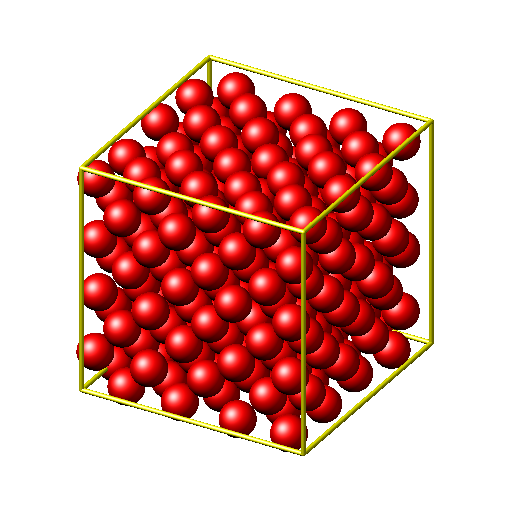

In [4]:
L.image(zoom=1)

## Queries about LAMMPS simulation

In [5]:
L.system

System(ylo=0.0, units='lj', xlo=0.0, dimensions=3, orthogonal_box=[6.71838, 6.71838, 6.71838], boundaries='p,p p,p p,p', ntypes=1, natoms=256, kspace_style='none', style='lj/cut', zlo=0.0, yhi=6.71838, xhi=6.71838, zhi=6.71838, atom_map='array', atom_style='atomic')

In [6]:
L.system.natoms

256

In [7]:
L.communication

Communication(comm_style='brick', comm_layout='uniform', proc_grid=[1, 1, 1], nprocs=1, nthreads=1, mpi_version='MPI v3.0', ghost_velocity=False)

In [8]:
L.fixes

[{'group': 'all', 'name': '1', 'style': 'nve'}]

In [9]:
L.computes

[{'group': 'all', 'name': 'thermo_temp', 'style': 'temp'},
 {'group': 'all', 'name': 'thermo_press', 'style': 'pressure'},
 {'group': 'all', 'name': 'thermo_pe', 'style': 'pe'}]

In [10]:
L.dumps

[]

In [11]:
L.groups

[{'name': 'all', 'type': 'static'}]

## Working with LAMMPS Variables

In [12]:
L.variable("a index 2")

In [13]:
L.variables

{'a': <lammps.Variable at 0x7f61783096d8>,
 'fx': <lammps.Variable at 0x7f61783098d0>}

In [14]:
L.variable("t equal temp")

In [15]:
L.variables

{'a': <lammps.Variable at 0x7f6178309438>,
 'fx': <lammps.Variable at 0x7f61783099b0>,
 't': <lammps.Variable at 0x7f6178309908>}

In [16]:
float(L.print('"${a}"'))

2.0

In [17]:
L.variables['t'].value

1.12985322128803

In [18]:
L.eval("v_t/2.0")

0.564926610644015

In [19]:
L.variable("b index a b c")

In [20]:
L.variables['b'].value

'a'

In [21]:
L.eval("v_b")

0.0

In [22]:
L.variables['b'].definition

['a', 'b', 'c']

In [23]:
L.variable("i loop 10")

In [24]:
L.variables['i'].value

1.0

In [25]:
L.next("i")
L.variables['i'].value

2.0

In [26]:
L.eval("ke")

1.6881595982135622

## Accessing Atom data

In [27]:
L.atoms[0]

In [28]:
[x for x in dir(L.atoms[0]) if not x.startswith('__')]

['charge',
 'force',
 'id',
 'index',
 'lmp',
 'mass',
 'mol',
 'position',
 'type',
 'velocity']

In [29]:
L.atoms[0].position

(-0.01214313575723994, -0.030471417344883317, -0.09285770282156164)

In [30]:
L.atoms[0].id

1

In [31]:
L.atoms[0].velocity

(-0.2400638079872712, -0.5469382338431744, -1.6999922351145154)

In [32]:
L.atoms[0].force

(-0.255291613596607, 4.609419196795491, 11.488556813439391)

In [33]:
L.atoms[0].type

1

In [40]:
L.variables['fx'].value

[-0.255291613596607,
 16.37266096862701,
 4.159322561393292,
 -10.358734928539349,
 -0.9411205246407262,
 2.938717474528063,
 -4.466552742048257,
 3.300931493929359,
 7.504103848449664,
 0.32879193591527645,
 -0.9406476961963371,
 -4.245722284654334,
 6.018469438850848,
 6.224548675112736,
 -1.3057190929343863,
 -4.54408845092879,
 4.302630565338362,
 -1.7752937195364038,
 -0.3537035449320157,
 -1.3938874511858526,
 -3.2776639119871187,
 3.160948290623288,
 -2.790188852792064,
 -0.9421802510034946,
 -13.724814879107763,
 -6.790155378420829,
 17.396062702331758,
 -5.771329649495489,
 -3.5023908236078265,
 7.496961111326418,
 -14.794500895776752,
 -14.720706631690351,
 -11.222160684284093,
 -17.894954250497932,
 8.404340282980602,
 -5.645941702083396,
 24.30811488965594,
 4.642599675775289,
 4.729539604038768,
 -0.4323819470652316,
 4.429779896132127,
 6.291952145215263,
 0.4284419246044248,
 -1.3300758523850174,
 2.714350256153217,
 -6.096739470326565,
 -0.5583077705790587,
 1.411589564